# GMM

Perform clustering of the iris dataset based on all variables using Gaussian mixture models. Use PCA to visualize clusters.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning /datasets/02_iris.csv')
# data = data.drop('Id', axis=1)
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [9]:
data = data.rename(columns={ 'variety':'species'})
data.head()

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [10]:
y = data['species']
X = data.drop('species', axis=1)
print(X.sample(5))
print(y.sample(5))

    sepal.length  sepal.width  petal.length  petal.width
63           6.1          2.9           4.7          1.4
31           5.4          3.4           1.5          0.4
10           5.4          3.7           1.5          0.2
83           6.0          2.7           5.1          1.6
40           5.0          3.5           1.3          0.3
73     Versicolor
104     Virginica
12         Setosa
109     Virginica
74     Versicolor
Name: species, dtype: object


In [11]:
data["species"].value_counts()

,count
species,
Setosa,50
Versicolor,50
Virginica,50


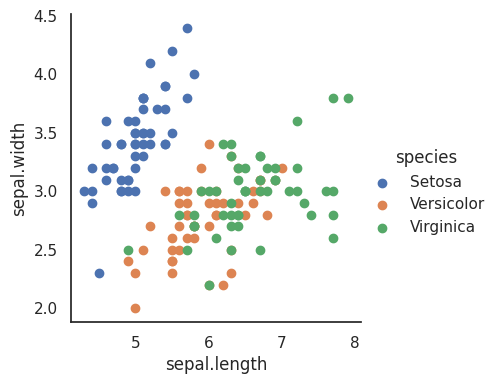

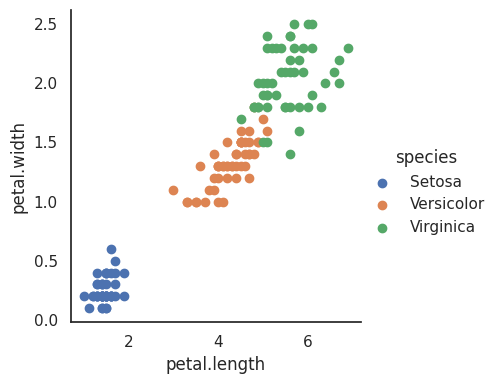

In [14]:
# use seaborn to make scatter plot showing species for each sample
# sns.FacetGrid(data, hue="species", size=4) \
#    .map(plt.scatter, "sepal_length", "sepal_width") \
#    .add_legend();
# sns.FacetGrid(data, hue="species", size=4) \
#    .map(plt.scatter, "petal_length", "petal_width") \
#    .add_legend();

# use seaborn to make scatter plot showing species for each sample
sns.FacetGrid(data, hue="species", height=4) \
   .map(plt.scatter, "sepal.length", "sepal.width") \
   .add_legend();
sns.FacetGrid(data, hue="species", height=4) \
   .map(plt.scatter, "petal.length", "petal.width") \
   .add_legend();

In [15]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(5)

,sepal.length,sepal.width,petal.length,petal.width
50,1.401508,0.328414,0.535409,0.264142
114,-0.052506,-0.592373,0.762758,1.580464
22,-1.506521,1.249201,-1.567576,-1.315444
80,-0.416010,-1.513160,0.023872,-0.130755
69,-0.294842,-1.282963,0.080709,-0.130755


**K-means clustering**

In [16]:
from sklearn.cluster import KMeans

nclusters = 3
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [17]:
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score

np.float64(0.45994823920518646)

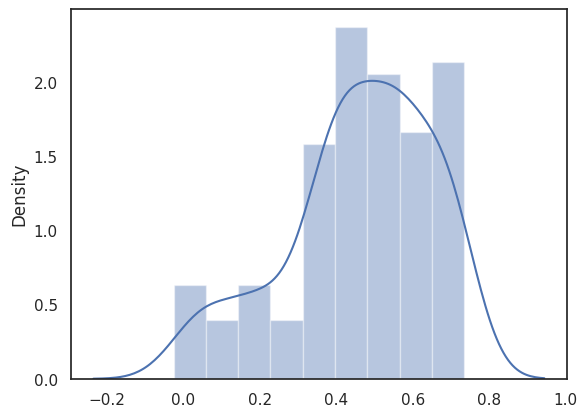

In [18]:
scores = metrics.silhouette_samples(X_scaled, y_cluster_kmeans)
sns.distplot(scores);

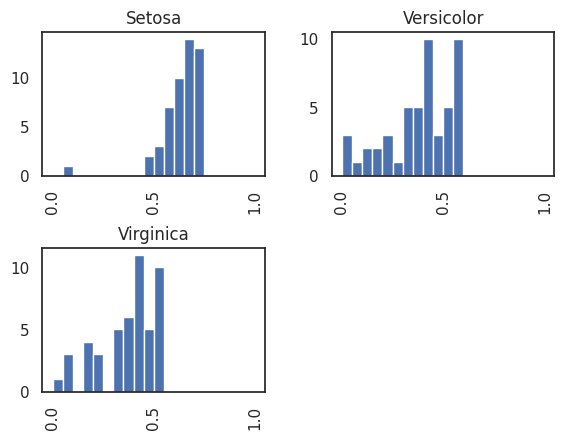

In [19]:
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['species'] = data['species']
df_scores.hist(by='species', column='SilhouetteScore', range=(0,1.0), bins=20);

**PCA**

In [20]:
from sklearn.decomposition import PCA

ndimensions = 2

pca = PCA(n_components=ndimensions, random_state=seed)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2']) # PC=principal component
X_pca.sample(5)

,PC1,PC2
64,-0.033355,-0.439003
57,-0.487323,-1.852429
148,1.372788,1.011254
95,0.091361,-0.181192
144,1.998147,1.049169


In [21]:
y_id_array = pd.Categorical(data['species']).codes
#Categorical.from_array(data['Species']).codes

df_plot = X_pca.copy()
df_plot['ClusterKmeans'] = y_cluster_kmeans
df_plot['SpeciesId'] = y_id_array # also add actual labels so we can use it in later plots
df_plot.head(5)

,PC1,PC2,ClusterKmeans,SpeciesId
0,-2.264703,0.480027,1,0
1,-2.080961,-0.674134,1,0
2,-2.364229,-0.341908,1,0
3,-2.299384,-0.597395,1,0
4,-2.389842,0.646835,1,0


In [22]:

def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    fig, ax = plt.subplots(figsize = (7,7))
    cmap = mpl.cm.get_cmap('prism')
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax,
                     kind = 'scatter',
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(nclusters-1)),
                     label = "%s %i" % (groupby, i),
                     s=30)
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Iris Dataset");

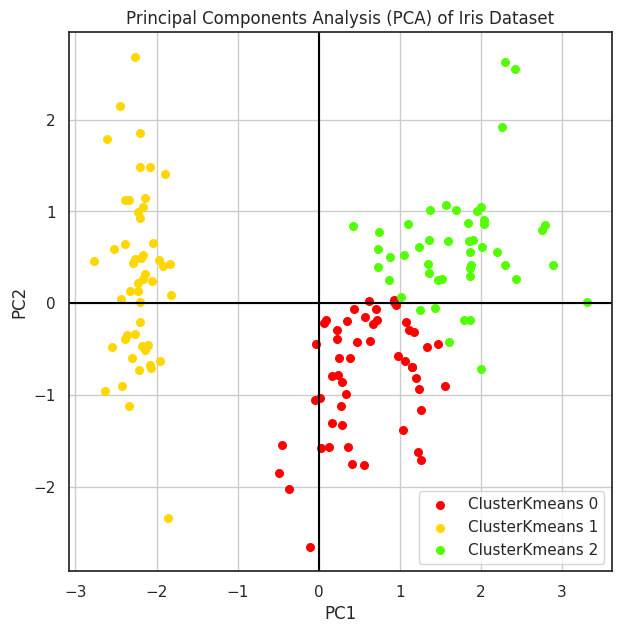

In [23]:
# plot the clusters each datapoint was assigned to
plotData(df_plot, 'ClusterKmeans')

**GMM**

In [24]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

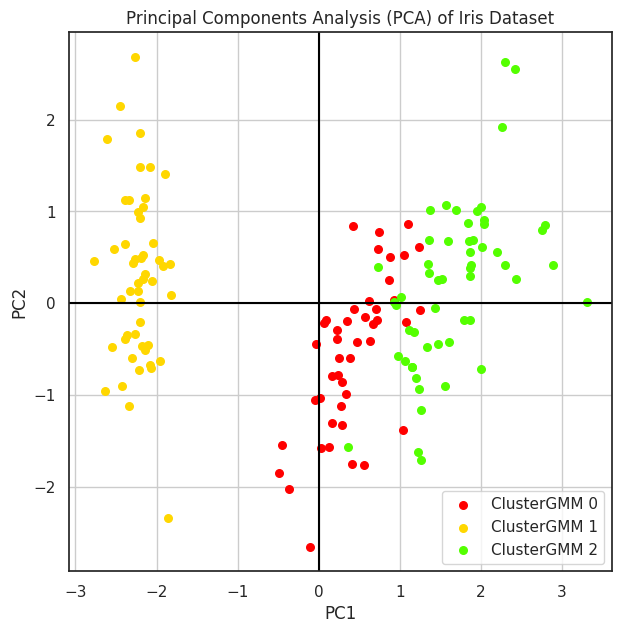

In [25]:
# add the GMM clusters to our data table and plot them
df_plot['ClusterGMM'] = y_cluster_gmm

plotData(df_plot, 'ClusterGMM')